In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]
plt.style.use('ggplot')

# Files

In [2]:
!ls -lh ../ | grep sessions

-rw-r--r-- 1 jupyter jupyter 1.8G Feb  8 18:06 sessions.csv
-rw-rw-r-- 1 jupyter jupyter 251M Feb 15 22:13 sessions.csv.zip
-rw-rw-r-- 1 jupyter jupyter 585K Feb 16 07:31 sessions_sample.csv


In [3]:
!ls -lh ../ | grep events

-rw-r--r-- 1 jupyter jupyter  13G Feb  8 19:16 events.csv
-rw-rw-r-- 1 jupyter jupyter 852M Feb 15 22:12 events.csv.zip
-rw-rw-r-- 1 jupyter jupyter 3.4G Feb 16 08:47 events.pkl
-rw-rw-r-- 1 jupyter jupyter 241K Feb 16 07:53 events_sample.csv


In [4]:
sessions = pd.read_pickle('../../session.pkl')

In [5]:
sessions.shape

(6239836, 22)

In [6]:
sessions.head(3).T

,0,1,2
app_id,4724682771660800,4724682771660800,4724682771660800
session_id,5558845121177764917,2201961907282901522,18781111175537580
start_timestamp,1542215364580,1543712977293,1539215568666
timezone,Asia/Manila,Asia/Manila,Asia/Manila
timezone_offset,28800000,28800000,28800000
previous_sessions_duration,25837591,35050130,11343848
user_created_timestamp,1538874289458,1538874289458,1538874289458
is_user_first_session,false,false,false
is_session,true,true,true
is_developer,false,false,false


In [10]:
sessions.dtypes

app_id                        category
session_id                      object
start_timestamp                  int64
timezone                        object
timezone_offset                 object
previous_sessions_duration       int64
user_created_timestamp           int64
is_user_first_session         category
is_session                    category
is_developer                  category
is_wau                        category
is_mau                        category
country                         object
region                          object
city                            object
latitude                       float64
longitude                      float64
locale                          object
os_name                       category
session_index                   object
device_id                       object
user_id_hash                    object
dtype: object

In [15]:
sessions.isna().sum(axis=0)

app_id                            0
session_id                        0
start_timestamp                   0
timezone                       9538
timezone_offset                9538
previous_sessions_duration        0
user_created_timestamp            0
is_user_first_session             0
is_session                        0
is_developer                      0
is_wau                            0
is_mau                            0
country                       16657
region                        12926
city                          12918
latitude                      12918
longitude                     12918
locale                         9538
os_name                       27444
session_index                     0
device_id                     18073
user_id_hash                      0
dtype: int64

# Type conversions

In [7]:
sessions['timezone'] = sessions.timezone.astype('category')
sessions['session_id'] = sessions.session_id.astype('category')

sessions['timezone_offset'] = sessions.timezone_offset.astype('category')
sessions['country'] = sessions.country.astype('category')

sessions['region'] = sessions.region.astype('category')
sessions['city'] = sessions.city.astype('category')
sessions['locale'] = sessions.locale.astype('category')
sessions['session_index'] = sessions.session_index.astype('category')
sessions['device_id'] = sessions.device_id.astype('category')
sessions['user_id_hash'] = sessions.user_id_hash.astype('category')

In [13]:
import datetime as dt
def to_dt(x):
    return dt.datetime.fromtimestamp(int(x / 1000)).date()

In [14]:
to_dt(1542215364580)

datetime.date(2018, 11, 14)

In [15]:
sessions['system_time'] = sessions.start_timestamp.apply(to_dt)

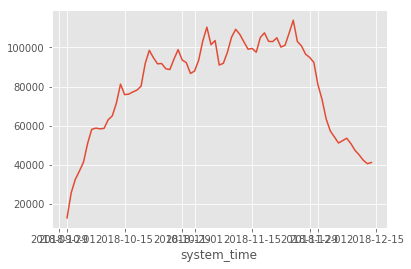

In [16]:
sessions.groupby(['system_time'])['session_id'].agg('nunique').plot()

# Filtering

In [7]:
sessions.is_developer.value_counts()

false    6237248
true        2588
Name: is_developer, dtype: int64

In [8]:
sessions = sessions[sessions.is_developer == 'false']

In [9]:
sessions.is_developer.value_counts()

false    6237248
true           0
Name: is_developer, dtype: int64

In [10]:
sessions.is_wau.value_counts()

false    6237248
Name: is_wau, dtype: int64

In [11]:
sessions.is_mau.value_counts()

false    6237248
Name: is_mau, dtype: int64

In [12]:
sessions.is_session.value_counts()

true     5165760
false    1071488
Name: is_session, dtype: int64

In [13]:
sessions.app_id.value_counts()

4724682771660800    6237248
Name: app_id, dtype: int64

In [14]:
sessions.drop(['app_id', 'is_wau', 'is_mau', 'is_developer'], inplace=True, axis=1)

In [15]:
sessions.columns

Index(['session_id', 'start_timestamp', 'timezone', 'timezone_offset',
       'previous_sessions_duration', 'user_created_timestamp',
       'is_user_first_session', 'is_session', 'country', 'region', 'city',
       'latitude', 'longitude', 'locale', 'os_name', 'session_index',
       'device_id', 'user_id_hash'],
      dtype='object')

In [57]:
sessions.session_id.value_counts()

3560659371756658029    5
7433233798305959073    5
5515145924555603809    4
1363834584790394329    4
609557900755891931     4
3511270119029099784    4
981050862813652801     4
4282083427578376962    4
2686845791995688200    4
2948145498424154772    4
8234507580735715676    4
7073701035951898000    4
7181203270392255054    4
5733478419407814022    4
6793221538399528226    4
4946080563163772736    4
8570057344190754166    4
8013170233750737207    4
2509137465339566307    4
2265864138944660728    4
8103651722053275035    4
4370462978918949975    4
1047968990076952849    4
5692393984206377688    4
4484590140357852242    4
6889931461165314870    4
2107568875380583163    4
1762867885601308741    4
2601699699101879084    4
8178020951018310100    4
                      ..
4326597836319597893    0
486750390491636433     0
4933919772134430471    0
5023318735079140726    0
6294253828399601420    0
4719732073464551617    0
7717210729887145906    0
6579214940402211110    0
5240611513412107822    0


In [17]:
sessions[sessions.session_id == '3560659371756658029'].T

,6203394,6203412,6203430,6203431,6203432
session_id,3560659371756658029,3560659371756658029,3560659371756658029,3560659371756658029,3560659371756658029
start_timestamp,1543898589156,1543898589156,1543898589156,1543898589156,1543898589156
timezone,Africa/Nairobi,Africa/Nairobi,Africa/Nairobi,Africa/Nairobi,Africa/Nairobi
timezone_offset,10800000,10800000,10800000,10800000,10800000
previous_sessions_duration,525962770,525962770,525962770,525962770,525962770
user_created_timestamp,1539461674060,1539461674060,1539461674060,1539461674060,1539461674060
is_user_first_session,false,false,false,false,false
is_session,false,true,false,false,false
country,KE,KE,KE,KE,KE
region,30,30,30,30,30


In [21]:
sessions.is_session.value_counts()

true     5165760
false    1071488
Name: is_session, dtype: int64

In [22]:
sessions = sessions[sessions.is_session == 'true']

In [23]:
sessions.shape

(5165760, 18)

In [25]:
sessions.drop(['is_session'], inplace=True, axis=1)

# EDA

In [26]:
for col in sessions.columns:
    print(f'{col}')
    print(f'\t {sessions[col].unique().shape}')

session_id
	 (5165730,)
start_timestamp
	 (5163281,)
timezone
	 (454,)
timezone_offset
	 (40,)
previous_sessions_duration
	 (4137765,)
user_created_timestamp
	 (619750,)
is_user_first_session
	 (2,)
country
	 (229,)
region
	 (756,)
city
	 (31541,)
latitude
	 (37501,)
longitude
	 (37237,)
locale
	 (1760,)
os_name
	 (4,)
session_index
	 (1404,)
device_id
	 (612318,)
user_id_hash
	 (619519,)


In [27]:
sessions.isna().sum(axis=0)

session_id                       0
start_timestamp                  0
timezone                         0
timezone_offset                  0
previous_sessions_duration       0
user_created_timestamp           0
is_user_first_session            0
country                       5425
region                        2737
city                          2730
latitude                      2730
longitude                     2730
locale                           0
os_name                          8
session_index                    0
device_id                        0
user_id_hash                     0
dtype: int64

In [29]:
sessions.user_id_hash.cat.codes[:3]

0    372255
1    372255
2    372255
dtype: int32

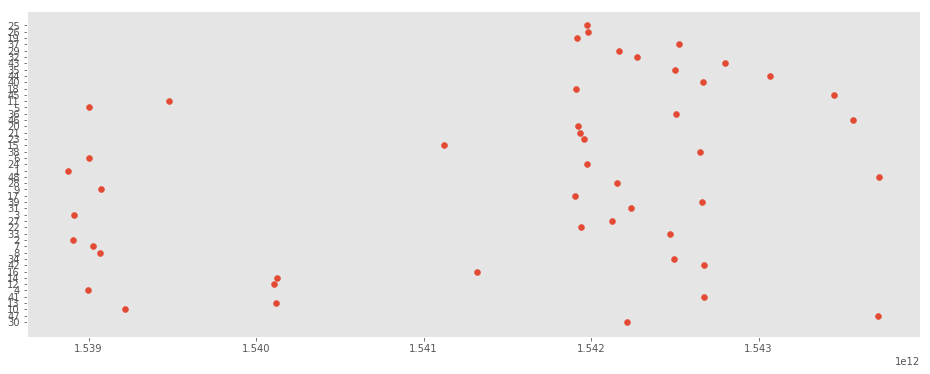

In [48]:
t =sessions.loc[sessions.user_id_hash.cat.codes == 372255, ['start_timestamp',
                                                            'session_index']].values
plt.scatter(t[:, 0], t[:, 1])
plt.grid(False)

In [53]:
sessions.reset_index(inplace=True, drop=True)

In [7]:
import datetime as dt

In [54]:
sessions['user_time'] = sessions.start_timestamp + sessions.timezone_offset.astype(np.int)

In [8]:
def to_dt(x):
    return dt.datetime.fromtimestamp(int(x/1000))

In [66]:
sessions.user_time = sessions.user_time.apply(lambda x: to_dt(x))

In [67]:
sessions.columns

Index(['session_id', 'start_timestamp', 'timezone', 'timezone_offset',
       'previous_sessions_duration', 'user_created_timestamp',
       'is_user_first_session', 'country', 'region', 'city', 'latitude',
       'longitude', 'locale', 'os_name', 'session_index', 'device_id',
       'user_id_hash', 'user_time'],
      dtype='object')

In [68]:
sessions.timezone_offset.unique()

[28800000, 0, -14400000, 19800000, 39600000, ..., 50400000, 49500000, 31500000, -43200000, -34200000]
Length: 40
Categories (40, object): [28800000, 0, -14400000, 19800000, ..., 49500000, 31500000, -43200000, -34200000]

In [69]:
sessions.timezone.unique()

[Asia/Manila, Europe/London, America/New_York, Asia/Kolkata, Australia/Sydney, ..., Canada/Mountain, America/Argentina/La_Rioja, GMT+05:30, Asia/Macao, Africa/Asmara]
Length: 454
Categories (454, object): [Asia/Manila, Europe/London, America/New_York, Asia/Kolkata, ..., America/Argentina/La_Rioja, GMT+05:30, Asia/Macao, Africa/Asmara]

In [70]:
sessions.to_pickle('../session2.pkl')

In [72]:
sessions.loc[sessions.user_id_hash.cat.codes == 372255].T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
session_id,5558845121177764917,2201961907282901522,18781111175537580,1477540082628742048,8184875317380844086,4706180700083856343,1672434284075955951,8451449588170786226,2261854641543944119,7620470736635924977,...,2658199659118296084,346242741644068108,1606256182540081395,570074261821414011,2232039880727664337,2722843010474960253,6460094204686017140,8475039498267991070,5459292485381163406,5226024100962698681
start_timestamp,1542215364580,1543712977293,1539215568666,1540120743010,1542671625528,1538997913013,1540106255109,1540123895593,1541320437287,1542674647158,...,1542669319744,1543070369677,1542504279101,1542797522007,1542271812801,1542165385484,1542525533146,1541915381950,1541980415987,1541978221244
timezone,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,...,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila
timezone_offset,28800000,28800000,28800000,28800000,28800000,28800000,28800000,28800000,28800000,28800000,...,28800000,28800000,28800000,28800000,28800000,28800000,28800000,28800000,28800000,28800000
previous_sessions_duration,25837591,35050130,11343848,13499724,32788010,5872534,12495345,14036096,14113619,32827242,...,32787945,33341300,28057886,32828773,25994012,25330049,30676728,17557430,23253903,23236244
user_created_timestamp,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,...,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458
is_user_first_session,false,false,false,false,false,false,false,false,false,false,...,false,false,false,false,false,false,false,false,false,false
country,PH,PH,PH,PH,PH,PH,PH,PH,PH,PH,...,PH,PH,PH,PH,PH,PH,PH,PH,PH,PH
region,00,00,00,11,00,11,11,11,00,00,...,00,00,00,00,00,00,00,00,11,11
city,makati,quezon city,makati,davao city,makati,davao city,davao city,davao city,quezon city,makati,...,makati,quezon city,makati,makati,makati,makati,makati,quezon city,davao city,davao city


* no of device id > user id
* do we need include lat-long 

In [5]:
sessions = pd.read_pickle('../session2.pkl')

# Features at User level

In [6]:
sessions.head().T

,0,1,2,3,4
session_id,5558845121177764917,2201961907282901522,18781111175537580,1477540082628742048,8184875317380844086
start_timestamp,1542215364580,1543712977293,1539215568666,1540120743010,1542671625528
timezone,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila
timezone_offset,28800000,28800000,28800000,28800000,28800000
previous_sessions_duration,25837591,35050130,11343848,13499724,32788010
user_created_timestamp,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458
is_user_first_session,false,false,false,false,false
country,PH,PH,PH,PH,PH
region,00,00,00,11,00
city,makati,quezon city,makati,davao city,makati


## divide by week subset

* Number of sessions in a week (min - max of session_index)
* did the user have first session this week ?
* number of locations this week
* median location this week
* median timezone this week
* median (country, region, city, locale, os)
* how old is the user at the end of the week

In [9]:
sessions['system_time'] = sessions.start_timestamp.apply(lambda x: to_dt(x))

In [61]:
sessions_sub = sessions[:1000]

In [11]:
sessions.system_time.min()

Timestamp('2018-10-01 07:00:04')

In [12]:
sessions.system_time.max()

Timestamp('2018-12-14 23:59:59')

In [17]:
sessions_sub.system_time.min()

Timestamp('2018-10-01 07:42:55')

In [18]:
sessions_sub.system_time.max()

Timestamp('2018-12-14 23:49:12')

In [22]:
sessions_sub.set_index('system_time', inplace=True)

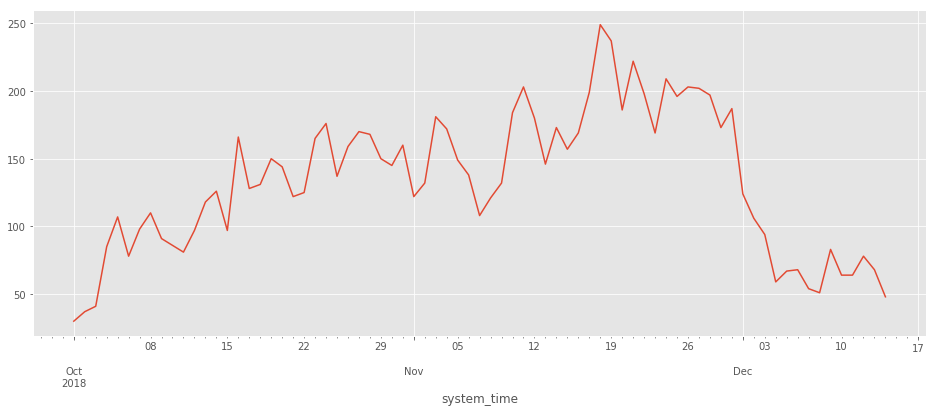

In [31]:
sessions_sub.session_id.resample(rule='1D').count().plot()

In [33]:
sessions.set_index('system_time', inplace=True)

In [55]:
base = sessions.index.min().date()
date_list = [base + dt.timedelta(days=x) for x in range(0, 76)]

In [56]:
date_list[-1]

datetime.date(2018, 12, 15)

In [57]:
sunday_list = [f for f in date_list if f.weekday() == 6]

In [58]:
sunday_list

[datetime.date(2018, 10, 7),
 datetime.date(2018, 10, 14),
 datetime.date(2018, 10, 21),
 datetime.date(2018, 10, 28),
 datetime.date(2018, 11, 4),
 datetime.date(2018, 11, 11),
 datetime.date(2018, 11, 18),
 datetime.date(2018, 11, 25),
 datetime.date(2018, 12, 2),
 datetime.date(2018, 12, 9)]

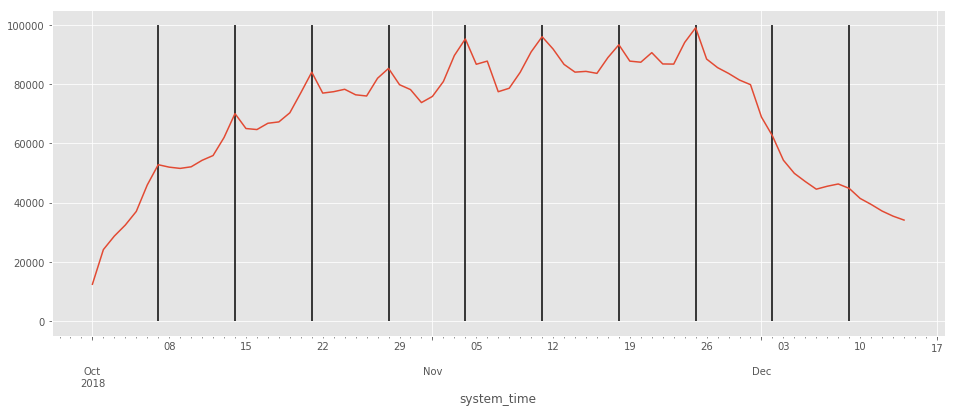

In [59]:
sessions.session_id.resample(rule='1D').count().plot()
for d in sunday_list:
    plt.vlines(x=d, ymin=0, ymax=100000)

# subsample

In [58]:
import datetime as dt

In [59]:
def to_dt(x):
    return dt.datetime.fromtimestamp(int(x/1000))

In [6]:
sessions_sub = sessions[:1000].copy()

In [61]:
sessions_sub.shape

(1000, 18)

In [62]:
sessions_sub['system_time'] = sessions_sub.start_timestamp.apply(lambda x: to_dt(x))

In [69]:
# sessions_sub.reset_index(inplace=True)

In [63]:
sessions_sub['week_start'] = sessions_sub.system_time.dt.to_period('W').apply(lambda r: r.start_time)

In [64]:
sessions_sub.dtypes

session_id                          category
start_timestamp                        int64
timezone                            category
timezone_offset                     category
previous_sessions_duration             int64
user_created_timestamp                 int64
is_user_first_session               category
country                             category
region                              category
city                                category
latitude                             float64
longitude                            float64
locale                              category
os_name                             category
session_index                       category
device_id                           category
user_id_hash                        category
user_time                     datetime64[ns]
system_time                   datetime64[ns]
week_start                    datetime64[ns]
dtype: object

In [65]:
sessions_sub.user_id_hash = sessions_sub.user_id_hash.astype('object')

In [66]:
sessions_sub.user_id_hash.unique().shape

(65,)

In [72]:
sessions_sub.session_index = sessions_sub.session_index.astype(np.int)

In [85]:
sessions_sub.is_user_first_session = \
    sessions_sub.is_user_first_session.apply(lambda x: True if x == 'true' else False)

In [95]:
sessions_sub.is_user_first_session = sessions_sub.is_user_first_session.astype(bool)

In [140]:
sessions_sub['user_days'] = sessions_sub.user_time.dt.date

In [96]:
sessions_sub.head().T

,0,1,2,3,4
session_id,5558845121177764917,2201961907282901522,18781111175537580,1477540082628742048,8184875317380844086
start_timestamp,1542215364580,1543712977293,1539215568666,1540120743010,1542671625528
timezone,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila
timezone_offset,28800000,28800000,28800000,28800000,28800000
previous_sessions_duration,25837591,35050130,11343848,13499724,32788010
user_created_timestamp,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458
is_user_first_session,False,False,False,False,False
country,PH,PH,PH,PH,PH
region,00,00,00,11,00
city,makati,quezon city,makati,davao city,makati


## divide by week subset

* Number of sessions in a week (min - max of session_index)
* did the user have first session this week ?
* number of locations this week
* median location this week
* median timezone this week
* median (country, region, city, locale, os)
* how old is the user at the end of the week

In [155]:
grpby_obj = sessions_sub.groupby(['week_start', 'user_id_hash'])

In [7]:
def weekly_aggregate(df):
    grp_cols = ['week_start', 'user_id_hash']
    grpby_obj = df.groupby(grp_cols)
    # number of sessions
    temp = grpby_obj.session_id.count().to_frame().reset_index().\
                rename(columns={'session_id': 'no_sessions'})
    # median city
    temp1 = grpby_obj.city.agg(lambda x: x.value_counts().index[0]
                               ).to_frame().reset_index()
    # is user's first week
    temp2 = grpby_obj.is_user_first_session.max().to_frame().reset_index()
    # median country
    temp3 = grpby_obj.country.agg(lambda x: x.value_counts().index[0]
                                  ).to_frame().reset_index()
    # no of country
    temp4 = grpby_obj.country.agg(lambda x: x.unique().shape[0]
                                  ).to_frame().reset_index().\
                        rename(columns={'country': 'country_count'})
    # median region
    temp5 = grpby_obj.region.agg(lambda x: x.value_counts().index[0]
                                 ).to_frame().reset_index()
    # no of region
    temp6 = grpby_obj.region.agg(lambda x: x.unique().shape[0]
                                  ).to_frame().reset_index().\
                        rename(columns={'region': 'region_count'})
    # median locale
    temp7 = grpby_obj.locale.agg(lambda x: x.value_counts().index[0]
                                 ).to_frame().reset_index()
    # median os_name
    temp8 = grpby_obj.os_name.agg(lambda x: x.value_counts().index[0]
                                  ).to_frame().reset_index()
    # no of days active
    temp9 = grpby_obj.user_days.agg(lambda x: x.unique().shape[0]).\
                to_frame().reset_index()
    # agg session time
    temp10 = grpby_obj.previous_sessions_duration.sum().\
                    to_frame().reset_index().\
                    rename(columns={'previous_sessions_duration': 'total_session_time'})
    # mean session time
    temp11 = grpby_obj.previous_sessions_duration.mean().\
                to_frame().reset_index().\
                rename(columns={'previous_sessions_duration': 'mean_session_time'})

    for i in range(1, 12):
        temp = temp.merge(locals()[f'temp{i}'], 
                          on=grp_cols)
    return temp

In [11]:
sessions_sub = sessions[:10000].copy()

In [12]:
result = weekly_aggregate(sessions_sub)

In [13]:
result.shape

(1945, 14)

In [15]:
split_dates = ['2018-10-01', '2018-10-08', '2018-10-15','2018-10-22',
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-18']

In [16]:
results = pd.DataFrame()
st = split_dates[0]
for sd in split_dates[1:]:
    sessions_sub = sessions[(sessions.system_time >= st) &\
                           (sessions.system_time < sd)].copy()
    print(f'{((sessions.system_time > st) & (sessions.system_time < sd)).sum()}')
    # res = weekly_aggregate(sessions_dd)
    # results = pd.concat([results, res])
    st = sd

# results.to_pickle('../transformed.pkl')

233413
397578
494834
551994
573002
600956
612343
632003
549909
332302
187414


In [14]:
result.head(1).T

,0
week_start,2018-10-01 00:00:00
user_id_hash,0025a6c398e0ec7c471342188141853877f94a76b51270...
no_sessions,4
city,omaha
is_user_first_session,True
country,US
country_count,1
region,ne
region_count,1
locale,en-US_US


In [10]:
result.shape

(145, 14)

In [154]:
sessions_sub[(sessions_sub.user_id_hash == '0a54e513d73bf22bcd23531615a8b456d3fb0d2449002013653942539afaf1aa') & \
                (sessions_sub.week_start == '2018-10-01')].T

,379,383,392,397
session_id,37688927718086661,286142836333673716,8236147442577099541,7419732095701556130
start_timestamp,1538911375814,1538922849828,1538914051855,1538910605675
timezone,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila
timezone_offset,28800000,28800000,28800000,28800000
previous_sessions_duration,173574,7130816,2046609,0
user_created_timestamp,1538910605675,1538910605675,1538910605675,1538910605675
is_user_first_session,False,False,False,True
country,PH,PH,PH,PH
region,00,00,00,00
city,quezon city,quezon city,quezon city,quezon city


In [166]:
result.week_start.unique()

array(['2018-10-01T00:00:00.000000000', '2018-10-08T00:00:00.000000000',
       '2018-10-15T00:00:00.000000000', '2018-10-22T00:00:00.000000000',
       '2018-10-29T00:00:00.000000000', '2018-11-05T00:00:00.000000000',
       '2018-11-12T00:00:00.000000000', '2018-11-19T00:00:00.000000000',
       '2018-11-26T00:00:00.000000000', '2018-12-03T00:00:00.000000000',
       '2018-12-10T00:00:00.000000000'], dtype='datetime64[ns]')

# Main

In [2]:
sessions = pd.read_pickle('../session2.pkl')

In [7]:
import datetime as dt

In [8]:
def to_dt(x):
    return dt.datetime.fromtimestamp(int(x/1000))

In [170]:
sessions['system_time'] = sessions.start_timestamp.apply(lambda x: to_dt(x))

In [172]:
# from multiprocessing import Pool

# num_partitions = 100
# num_cores = 4
# def parallelize_dataframe(df, func):
#     df_split = np.array_split(df, num_partitions)
#     pool = Pool(num_cores)
#     df = pd.concat(pool.map(func, df_split))
#     pool.close()
#     pool.join()
#     return df

# def wrapper_get_sentiment(df):
#     df['sentiment'] = df['body'].apply(get_sentiment)
#     return df

# sentiment = parallelize_dataframe(df['body'].to_frame(), wrapper_get_sentiment)

In [171]:
sessions['week_start'] = sessions.system_time.dt.to_period('W').\
            apply(lambda r: r.start_time)

In [173]:
sessions.user_id_hash = sessions.user_id_hash.astype('object')

In [174]:
sessions.session_index = sessions.session_index.astype(np.int)

In [175]:
sessions.is_user_first_session = \
    sessions.is_user_first_session.apply(lambda x: True if x == 'true' else False)

In [176]:
sessions.is_user_first_session = sessions.is_user_first_session.astype(bool)

In [179]:
sessions['user_days'] = sessions.user_time.dt.date

In [180]:
sessions.head(2).T

,0,1
session_id,5558845121177764917,2201961907282901522
start_timestamp,1542215364580,1543712977293
timezone,Asia/Manila,Asia/Manila
timezone_offset,28800000,28800000
previous_sessions_duration,25837591,35050130
user_created_timestamp,1538874289458,1538874289458
is_user_first_session,False,False
country,PH,PH
region,00,00
city,makati,quezon city


In [207]:
sessions.to_pickle('../session3.pkl')

# Dask implementation

In [2]:
import pandas as pd
import numpy as np

In [3]:
sessions = pd.read_pickle('../session3.pkl')

In [19]:
import dask.dataframe as dd

In [4]:
sessions_dd = dd.from_pandas(sessions, npartitions=10)

In [78]:
del sessions
import gc
gc.collect()

1403

In [24]:
# link https://stackoverflow.com/questions/46080171/constructing-mode-and-corresponding-count-functions-using-custom-aggregation-fun
# https://github.com/dask/dask/issues/2708

def chunk_mode(s):
    return s.apply(lambda s: [s.value_counts()])

def agg_mode(s):
    s = s._selected_obj    
    return s.groupby(level=list(range(s.index.nlevels))).sum()


def finalize_mode(s):
    if not isinstance(s.iloc[0], list):
        return s
    return s.map(lambda i: i[0].argmax())

mode = dd.Aggregation('mode', chunk_mode, agg_mode, finalize_mode)

In [25]:
# https://stackoverflow.com/questions/45922884/dask-nunique-method-on-dataframe-groupby

def chunk_unique(s):
    return s.apply(lambda x: list(set(x)))

def agg_unique(s):
    s = s._selected_obj    
    return s.groupby(level=list(range(s.index.nlevels))).sum()

def finalize_unique(s):
    return s.apply(lambda x: len(set(x)))

tunique = dd.Aggregation('tunique', chunk_unique, agg_unique, finalize_unique)

In [26]:
def weekly_aggregate_dask(df):
    grp_cols = ['week_start', 'user_id_hash']
    grpby_obj = df.groupby(grp_cols)

    print('number of sessions')
    temp = grpby_obj.session_id.count().reset_index().\
                rename(columns={'session_id': 'no_sessions'}).compute()
    print('mode city')
    temp1 = grpby_obj.agg({'city': mode}).reset_index().compute()
    # temp1 = grpby_obj['city'].last().reset_index().compute()
#     temp1 = grpby_obj['city'].apply(lambda x: x[0], meta=('int')).\
#                 reset_index().compute()
    print('is users first week')
    temp2 = grpby_obj.is_user_first_session.max().reset_index().compute()
    print('mode country')
    temp3 = grpby_obj.agg({'country': mode}).reset_index().compute()
    # temp3 = grpby_obj.country.first().reset_index().compute()
    print('no of country')
    temp4 = grpby_obj.agg({'country': tunique}).reset_index().\
                rename(columns={'country': 'country_count'}).compute()
    print('mode region')
    temp5 = grpby_obj.agg({'region': mode}).reset_index().compute()
#     temp5 = grpby_obj.region.first().reset_index().compute()
    print('no of region')
    temp6 = grpby_obj.agg({'region': tunique}).reset_index().\
                rename(columns={'region': 'region_count'}).compute()
    print('mode locale')
    temp7 = grpby_obj.agg({'locale': mode}).reset_index().compute()
#     temp7 = grpby_obj.locale.first().reset_index().compute()
    print('mode os_name')
    temp8 = grpby_obj.agg({'os_name': mode}).reset_index().compute()
#     temp8 = grpby_obj.os_name.first().reset_index().compute()
    print('no of days active')
    temp9 = grpby_obj.agg({'user_days': tunique}).reset_index().compute()
    print('agg session time')
    temp10 = grpby_obj.previous_sessions_duration.sum().\
                    reset_index().\
                    rename(columns={'previous_sessions_duration': 'total_session_time'}).\
                    compute()
    print('mean session time')
    temp11 = grpby_obj.previous_sessions_duration.mean().\
                reset_index().\
                rename(columns={'previous_sessions_duration': 'mean_session_time'}).\
                compute()

    for i in range(2, 12):
        temp = temp.merge(locals()[f'temp{i}'], 
                          on=grp_cols)
    return temp

In [20]:
from dask.diagnostics import ProgressBar

In [21]:
ProgressBar().register()

In [29]:
sessions_sub = sessions[:10000].copy()

In [30]:
result = weekly_aggregate(sessions_sub)

In [35]:
sessions_dd = dd.from_pandas(sessions[:10000].copy(), npartitions=10)

In [34]:
# 1 partitions
result = weekly_aggregate_dask(sessions_dd)

number of sessions
[########################################] | 100% Completed |  0.1s
mode city
[########################################] | 100% Completed | 13.3s
is users first week
[########################################] | 100% Completed |  0.1s
mode country
[########################################] | 100% Completed |  2.3s
no of country
[########################################] | 100% Completed |  0.8s
mode region
[########################################] | 100% Completed |  2.5s
no of region
[########################################] | 100% Completed |  1.0s
mode locale
[########################################] | 100% Completed |  2.8s
mode os_name
[########################################] | 100% Completed |  2.2s
no of days active
[########################################] | 100% Completed |  0.7s
agg session time
[########################################] | 100% Completed |  0.1s
mean session time
[########################################] | 100% Completed |  0.1s


In [32]:
# 4 partitions
result = weekly_aggregate_dask(sessions_dd)

number of sessions
[########################################] | 100% Completed |  0.1s
mode city
[########################################] | 100% Completed | 17.7s
is users first week
[########################################] | 100% Completed |  0.1s
mode country
[########################################] | 100% Completed |  3.5s
no of country
[########################################] | 100% Completed |  0.9s
mode region
[########################################] | 100% Completed |  3.8s
no of region
[########################################] | 100% Completed |  0.9s
mode locale
[########################################] | 100% Completed |  4.4s
mode os_name
[########################################] | 100% Completed |  2.9s
no of days active
[########################################] | 100% Completed |  0.7s
agg session time
[########################################] | 100% Completed |  0.1s
mean session time
[########################################] | 100% Completed |  0.1s


In [36]:
# 10 partitions
result = weekly_aggregate_dask(sessions_dd)

number of sessions
[########################################] | 100% Completed |  0.1s
mode city
[########################################] | 100% Completed | 20.8s
is users first week
[########################################] | 100% Completed |  0.1s
mode country
[########################################] | 100% Completed |  4.2s
no of country
[########################################] | 100% Completed |  1.4s
mode region
[########################################] | 100% Completed |  5.5s
no of region
[########################################] | 100% Completed |  1.4s
mode locale
[########################################] | 100% Completed |  5.2s
mode os_name
[########################################] | 100% Completed |  3.9s
no of days active
[########################################] | 100% Completed |  1.2s
agg session time
[########################################] | 100% Completed |  0.1s
mean session time
[########################################] | 100% Completed |  0.2s


In [10]:
split_dates = ['2018-10-01', '2018-10-08', '2018-10-15','2018-10-22',
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-18']

In [11]:
sessions.shape

(5165760, 21)

In [12]:
sessions.city.fillna(value='?', inplace=True)

In [13]:
sessions.country = sessions.country.cat.add_categories(['unknown'])
sessions.country.fillna(value='unknown', inplace=True)

In [14]:
sessions.region = sessions.region.cat.add_categories(['unknown'])
sessions.region.fillna(value='unknown', inplace=True)

In [15]:
sessions.os_name = sessions.os_name.cat.add_categories(['unknown'])
sessions.os_name.fillna(value='unknown', inplace=True)

In [16]:
sessions.latitude.fillna(value=0, inplace=True)
sessions.longitude.fillna(value=0, inplace=True)

In [17]:
sessions.isna().sum(axis=0)

session_id                    0
start_timestamp               0
timezone                      0
timezone_offset               0
previous_sessions_duration    0
user_created_timestamp        0
is_user_first_session         0
country                       0
region                        0
city                          0
latitude                      0
longitude                     0
locale                        0
os_name                       0
session_index                 0
device_id                     0
user_id_hash                  0
user_time                     0
system_time                   0
week_start                    0
user_days                     0
dtype: int64

In [18]:
sessions.dtypes

session_id                          category
start_timestamp                        int64
timezone                            category
timezone_offset                     category
previous_sessions_duration             int64
user_created_timestamp                 int64
is_user_first_session                   bool
country                             category
region                              category
city                                category
latitude                             float64
longitude                            float64
locale                              category
os_name                             category
session_index                          int64
device_id                           category
user_id_hash                          object
user_time                     datetime64[ns]
system_time                   datetime64[ns]
week_start                    datetime64[ns]
user_days                             object
dtype: object

In [ ]:
result = weekly_aggregate_dask(sessions_dd)
results.to_pickle('../transformed.pkl')

number of sessions
[########################################] | 100% Completed | 11.5s
mode city
[                                        ] | 0% Completed |  1min 35.2s

In [ ]:
results = pd.DataFrame()
st = split_dates[0]
for sd in split_dates[1:]:
    sessions_dd = dd.from_pandas(sessions[(sessions.system_time >= st) &\
                                          (sessions.system_time < sd)].copy(),
                                 npartitions=10)
    print(f'{((sessions.system_time > st) & (sessions.system_time < sd)).sum()}')
    res = weekly_aggregate_dask(sessions_dd)
    results = pd.concat([results, res])
    st = sd

results.to_pickle('../transformed.pkl')

233413
number of sessions
[########################################] | 100% Completed |  0.7s
mode city
[################                        ] | 40% Completed | 13.2s

In [ ]:
results.shape

# Multiprocess Pandas

In [47]:
gc.collect()

77826

In [4]:
sessions.head().T

,0,1,2,3,4
session_id,5558845121177764917,2201961907282901522,18781111175537580,1477540082628742048,8184875317380844086
start_timestamp,1542215364580,1543712977293,1539215568666,1540120743010,1542671625528
timezone,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila,Asia/Manila
timezone_offset,28800000,28800000,28800000,28800000,28800000
previous_sessions_duration,25837591,35050130,11343848,13499724,32788010
user_created_timestamp,1538874289458,1538874289458,1538874289458,1538874289458,1538874289458
is_user_first_session,False,False,False,False,False
country,PH,PH,PH,PH,PH
region,00,00,00,11,00
city,makati,quezon city,makati,davao city,makati


In [9]:
sessions.user_created_timestamp = sessions.user_created_timestamp.apply(lambda x: to_dt(x))

In [15]:
sessions['user_age'] = (sessions.system_time - sessions.user_created_timestamp)

In [18]:
sessions['user_age'] = sessions.user_age.dt.days

In [19]:
sessions_sub = sessions[:1000].copy()

In [22]:
temp = sessions.groupby(['week_start', 'user_id_hash']).user_age.first().to_frame().reset_index()

In [25]:
temp = sessions.groupby(['week_start', 'user_id_hash']).user_time.first().to_frame().reset_index()

In [29]:
temp.user_time = temp.user_time.dt.hour

In [30]:
temp.to_pickle('../user_time.pkl')

In [24]:
temp.to_pickle('../user_age.pkl')

In [56]:
def weekly_aggregate(df):
    grp_cols = ['week_start', 'user_id_hash']
    grpby_obj = df.groupby(grp_cols)
    # number of sessions
    temp = grpby_obj.city.count().to_frame().reset_index().\
                rename(columns={'session_id': 'no_sessions'})
    # median city
    temp1 = grpby_obj.city.agg(lambda x: x.value_counts().index[0]
                               ).to_frame().reset_index()
    # is user's first week
    temp2 = grpby_obj.is_user_first_session.max().to_frame().reset_index()
    # median country
    temp3 = grpby_obj.country.agg(lambda x: x.value_counts().index[0]
                                  ).to_frame().reset_index()
    # no of country
    temp4 = grpby_obj.country.agg(lambda x: x.unique().shape[0]
                                  ).to_frame().reset_index().\
                        rename(columns={'country': 'country_count'})
    # median region
    temp5 = grpby_obj.region.agg(lambda x: x.value_counts().index[0]
                                 ).to_frame().reset_index()
    # no of region
    temp6 = grpby_obj.region.agg(lambda x: x.unique().shape[0]
                                  ).to_frame().reset_index().\
                        rename(columns={'region': 'region_count'})
    # median locale
    temp7 = grpby_obj.locale.agg(lambda x: x.value_counts().index[0]
                                 ).to_frame().reset_index()
    # median os_name
    temp8 = grpby_obj.os_name.agg(lambda x: x.value_counts().index[0]
                                  ).to_frame().reset_index()
    # no of days active
    temp9 = grpby_obj.user_days.agg(lambda x: x.unique().shape[0]).\
                to_frame().reset_index()
    # agg session time
    temp10 = grpby_obj.previous_sessions_duration.sum().\
                    to_frame().reset_index().\
                    rename(columns={'previous_sessions_duration': 'total_session_time'})
    # mean session time
    temp11 = grpby_obj.previous_sessions_duration.mean().\
                to_frame().reset_index().\
                rename(columns={'previous_sessions_duration': 'mean_session_time'})

    for i in range(1, 12):
        temp = temp.merge(locals()[f'temp{i}'], 
                          on=grp_cols)
    return temp

In [42]:
sessions.shape

(5165760, 21)

In [43]:
req_cols = ['city', 'week_start', 'user_id_hash', 'is_user_first_session', 'country', 
            'region', 'locale', 'os_name', 'user_days', 'previous_sessions_duration']

sessions = sessions[req_cols]

In [45]:
sessions.shape

(5165760, 10)

In [46]:
sessions.head(2).T

,0,1
city,makati,quezon city
week_start,2018-11-12 00:00:00,2018-11-26 00:00:00
user_id_hash,9943447915df3a45fd6720a026af905b6da6b56a37701b...,9943447915df3a45fd6720a026af905b6da6b56a37701b...
is_user_first_session,False,False
country,PH,PH
region,00,00
locale,en_GB,en_GB
os_name,Android OS,Android OS
user_days,2018-11-15,2018-12-02
previous_sessions_duration,25837591,35050130


In [50]:
week_dates = sessions.week_start.dt.date.unique()

In [59]:
week_dates

array([datetime.date(2018, 10, 1), datetime.date(2018, 10, 8),
       datetime.date(2018, 10, 15), datetime.date(2018, 10, 22),
       datetime.date(2018, 10, 29), datetime.date(2018, 11, 5),
       datetime.date(2018, 11, 12), datetime.date(2018, 11, 19),
       datetime.date(2018, 11, 26), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 10)], dtype=object)

In [60]:
results = pd.DataFrame()

for wst in week_dates:
    print(f'{wst}: {(sessions.week_start == wst).sum()}')
    sessions_sub = sessions[sessions.week_start == wst]
    res = weekly_aggregate(sessions_sub)
    break
    results = pd.concat([results, res])

2018-10-01: 233413


In [68]:
res.shape

(64678, 14)

In [92]:
def wrapper_agg(wst):
    sessions_ss = sessions[sessions.week_start == wst].copy()
    return weekly_aggregate(sessions_ss)

In [70]:
from concurrent.futures import ProcessPoolExecutor, as_completed
from fastprogress import progress_bar

def parallel(func, job_list, n_jobs=12):
    with ProcessPoolExecutor(max_workers=n_jobs) as pool:
        futures = [pool.submit(func, job) for job in job_list]
        for f in progress_bar(as_completed(futures), total=len(job_list)):
            pass
    return [f.result() for f in futures]

In [93]:
result = parallel(wrapper_agg, week_dates)

In [94]:
result = pd.concat(result)

In [95]:
result.shape

(995976, 14)

In [96]:
result.to_pickle('../transformed.pkl')

## checking if the result is equal

In [79]:
result2 = weekly_aggregate(sessions_sub)

In [80]:
result2.shape

(1945, 14)

In [86]:
result.sort_values('user_id_hash').equals(result2.sort_values('user_id_hash'))

False

In [91]:
(result.values == result2.values).sum(axis=0)

array([1945, 1945, 1945, 1945, 1945, 1945, 1945, 1945, 1945, 1945, 1945,
       1945, 1945, 1945])

# submission type

In [16]:
!head ../sample_submission_2.csv

user_id_hash,user_purchase_binary_7_days,user_purchase_binary_14_days
e469dfaed039ead9110165d9bc457acb11609ca34057dc77aad7c5e266b3c09f,0.01,0.02
afcc639a324b6c598ef83d360450afa011cb2dd1358bf95acbf29decbe3bf4e2,0.01,0.02
fd5a7cf211d08e3e00f7be6a9df6e6ea3d2e5c22a5d9c37a867730a869f661a9,0.01,0.02
00bfff98b9d0329f014c2eeac7ce47cd18b2bc6e10d608dcb18625c9957398b5,0.01,0.02
0d298f3638c43e915c119d4935e1ce8d168f81b5e3e8c16e422524c298adfbe7,0.01,0.02
7f7e3c5da13a555b2c2047c2c94b45d289ffa8083908cb55a9d32692d675aac7,0.01,0.02
28b5edd0510e8517462bae9d67a99f272d8ccc8ba2f79d65624f98c6a8a50012,0.01,0.02
b9433b9c4d559218e64469b6807cb516a5866572c1c30bb75f7ecb9ee5379ef7,0.01,0.02
607da741597a3b15fecf9a30c76e2e418b629c975e069aba60af709a277e84b9,0.01,0.02


In [24]:
submission = pd.read_csv('../sample_submission_2.csv')